# Analyzing text

In [1]:
# Imports
import re # Regex - Regular expressions for matching words/characters
import json
import timeit
import numpy as np
from scipy import sparse
from collections import Counter
import matplotlib.pyplot as plt
from pylab import *
from NDSparseTensor import NDSparseTensor

## Load text and extract words

In [3]:
def extract_words(text):
    """Finds all words in a text string"""
    words = re.findall(r"[\w']+", text)

    words = list(map(lambda w: w.upper(), words))
    return words

def extract_characters(text):
    """Finds all characters in a text string"""
    characters = re.findall(r"[a-z A-Z]", text)
    
    characters = list(map(lambda c: c.upper(), characters))
    return characters

# NOT IMPLEMENTED
def remove_names(words):
    return None

In [4]:
text_name = 'Pride and Prejudice'
# text_name = 'Bibeln'

symbols = []
with open(f'books/{text_name}.txt', 'r', encoding="utf8") as f:
    contents = f.readlines()
    for line in contents:
        x = extract_words(line)
        # x = extract_characters(line)
        symbols.extend(x)

n_symbols = len(symbols)
print(f"Total number of symbols in the text '{text_name}' is {n_symbols}")

FileNotFoundError: [Errno 2] No such file or directory: 'books/Pride and Prejudice.txt'

## Calculate the frequencies of all unique words

In [4]:
frequencies = dict(Counter(symbols))
labels, values = zip(*frequencies.items())
descending = np.argsort(values)[::-1]
unique_symbols = np.array(labels)[descending]
unique_symbols = list(unique_symbols)

number_of_unique_symbols = len(unique_symbols)
print(f'The number of unique symbols are {number_of_unique_symbols}')

most_common = max(frequencies, key=frequencies.get)
print(f"The most common symbol is '{most_common}'. it occures {frequencies[most_common]} times. The rate is {frequencies[most_common]/n_symbols}")

The number of unique symbols are 6762
The most common symbol is 'THE'. it occures 4507 times. The rate is 0.03570721195363687


## Frequency plot

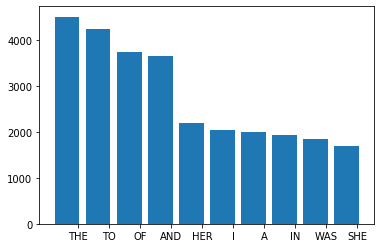

In [5]:
counts = dict(Counter(symbols).most_common(10))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

## Calculate frequencies of sequences

In [12]:
start = timeit.time.time()
frequencies2d = NDSparseTensor((number_of_unique_symbols, number_of_unique_symbols))
for previous, current in zip(symbols[:-1], symbols[1:]):
    index_previous = unique_symbols.index(previous)
    index_current = unique_symbols.index(current)

    frequencies2d[index_previous, index_current] += 1
end = timeit.time.time()

print(f'Time: {end-start} seconds')
print(unique_symbols[:10])
print(frequencies2d[:10, :10].todense())

i1 = 2
i2 = 0
print(f"Sequence '{i1} {i2}': '{unique_symbols[i1]} {unique_symbols[i2]}' occurs {frequencies2d[i1, i2]} times")

Time: 4.442443370819092 seconds
['THE', 'TO', 'OF', 'AND', 'HER', 'I', 'A', 'IN', 'WAS', 'SHE']
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [268.   0.   0.   4. 173.   0.  44.   0.   1.   1.]
 [491.   1.   1.   4. 260.   3. 115.   3.   0.   1.]
 [165.  48.  33.   0.  87. 124.  38.  51.  48. 111.]
 [ 22.  59.  15.  57.   3.  10.  18.  23.   9.  27.]
 [  0.   3.   0.   1.   0.   1.   0.   0.  66.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [396.   2.   0.   5.  95.   2. 138.   0.   0.   1.]
 [ 51.  58.  11.   5.  11.   3.  84.  41.   0.   8.]
 [  0.   4.   0.   8.   0.  11.   0.   1. 209.   0.]]
Sequence '2 0': 'OF THE' occurs 491 times


In [13]:
frequencies = {}

for m in range(1, 10):
    start = timeit.time.time()

    N = number_of_unique_symbols
    shape = tuple([N for _ in range(m)])
    frequencies_m = NDSparseTensor(shape)

    sequences = [symbols[i:(-m+i)%len(symbols)+1] for i in range(m)]
    for sequence_m in zip(*sequences):
        symbol_indicies_m = tuple([unique_symbols.index(s) for s in sequence_m])
        frequencies_m[symbol_indicies_m] += 1

    end = timeit.time.time()

    print(f'Calculated m={m}, shape={frequencies_m.shape} in {end-start} seconds')
    frequencies[m] = frequencies_m

Calculated m=1, shape=(6762,) in 2.8643598556518555 seconds
Calculated m=2, shape=(6762, 6762) in 4.244571924209595 seconds
Calculated m=3, shape=(6762, 6762, 6762) in 6.379338502883911 seconds
Calculated m=4, shape=(6762, 6762, 6762, 6762) in 6.676144123077393 seconds
Calculated m=5, shape=(6762, 6762, 6762, 6762, 6762) in 9.330627202987671 seconds
Calculated m=6, shape=(6762, 6762, 6762, 6762, 6762, 6762) in 10.20612359046936 seconds
Calculated m=7, shape=(6762, 6762, 6762, 6762, 6762, 6762, 6762) in 12.180991411209106 seconds
Calculated m=8, shape=(6762, 6762, 6762, 6762, 6762, 6762, 6762, 6762) in 14.471318483352661 seconds
Calculated m=9, shape=(6762, 6762, 6762, 6762, 6762, 6762, 6762, 6762, 6762) in 15.853876113891602 seconds


## Example of accessing the frequencies
Length of symbol sequence `m`

In [8]:
m = 2
i1 = 9
i2 = 8
print(f"Sequence '{i1} {i2}': '{unique_symbols[i1]} {unique_symbols[i2]}' occurs {frequencies[m][i1, i2]} times")

m = 3
i1 = 9
i2 = 8
i3 = 0
print(f"Sequence '{i1} {i2} {i3}': '{unique_symbols[i1]} {unique_symbols[i2]} {unique_symbols[i3]}' occurs {frequencies[m][i1, i2, i3]} times")

Sequence '9 8': 'SHE WAS' occurs 209 times
Sequence '9 8 0': 'SHE WAS THE' occurs 4 times


Text(0, 0.5, 'Unique sequences, $S_m$')

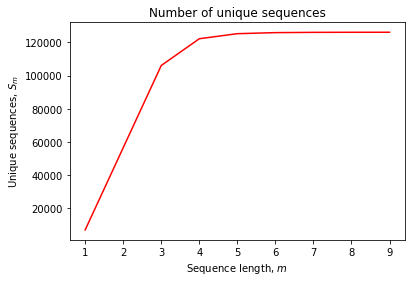

In [14]:
m_array = []
n_array = []
for m in range(1, len(frequencies)+1):
    n = len(frequencies[m].getnonzero())
    m_array.append(m)
    n_array.append(n)
plot(m_array, n_array, 'r-')
title(f'Number of unique sequences')
xlabel('Sequence length, $m$')
ylabel('Unique sequences, $S_m$')

In [27]:
m = 3
nonzeros = frequencies[m].getnonzero()

keys = list([x[0] for x in nonzeros])
values = list([x[1] for x in nonzeros])
sort = (np.argsort(values)[::-1])
keys = np.array(keys)[sort]
values = np.array(values)[sort]

most_common_sequence_m = [unique_symbols[k] for k in keys[0]]
print(f"The most common sequence of length m={m} is: \n'{' '.join(most_common_sequence_m)}' \nwhich occurs {values[0]} times")

The most common sequence of length m=3 is: 
'I AM SURE' 
which occurs 62 times


## Save files

In [30]:
for m in frequencies.keys():
    with open(f'frequencies/{text_name} m{m}.json', 'w', encoding="utf-8") as f:
        f.writelines(frequencies[m].tojson())

In [5]:
with open(f'frequencies/{text_name} unique symbols.json', 'w', encoding="utf-8") as f:
    json.dump(unique_symbols, f)

## Load files

In [31]:
## Read a NDSparseMatrix
frequencies_loaded = {}
for m in range(1, 10):
    with open(f'frequencies/{text_name} m{m}.json', 'r', encoding="utf8") as f:
        json_text = f.read()

        frequencies_loaded[m] = NDSparseTensor.fromjson(json_text)


In [6]:
with open(f'frequencies/{text_name} unique symbols.json', 'r', encoding="utf-8") as f:
    unique_symbols = json.load(f)

## More examples

In [53]:
previous = 9, 8
some_frequencies = frequencies_loaded[3][(*previous, slice(None, 10))]
for key, a_frequency in some_frequencies.getnonzero():
    next_symbol_index = key[0]
    previous_sequence = ' '.join([unique_symbols[i] for i in previous])
    next_symbol = unique_symbols[next_symbol_index]
    print(f"Sequence '{previous_sequence} {next_symbol}' occurs {a_frequency} times")

Sequence 'SHE WAS THE' occurs 4 times
Sequence 'SHE WAS TO' occurs 6 times
Sequence 'SHE WAS OF' occurs 2 times
Sequence 'SHE WAS AND' occurs 3 times
Sequence 'SHE WAS A' occurs 7 times
Sequence 'SHE WAS IN' occurs 8 times
Sequence 'SHE WAS SHE' occurs 1 times


In [11]:
print('Shape of tensor before vs after extracting a row')
freq2 = frequencies_loaded[2]
print(f'Before {freq2.shape} \n{freq2[:3, :5].todense()}')

row = freq2[2, :]
print(f'After  {row.shape} \n{row[:5]}')

Shape of tensor before vs after extracting a row
Before (6762, 6762) 
[[  0.   0.   0.   0.   0.]
 [268.   0.   0.   4. 173.]
 [491.   1.   1.   4. 260.]]
After  (6762,) 
[491, 1, 1, 4, 260]
